# Task 4: Portfolio Optimization Based on Forecasts

This notebook implements Modern Portfolio Theory (MPT) to optimize portfolio allocation using:
- **TSLA**: Forecasted returns from best-performing model (Task 2)
- **BND & SPY**: Historical average returns
- **Covariance Matrix**: Based on historical daily returns

## Objectives
1. Generate Efficient Frontier
2. Identify Maximum Sharpe Ratio Portfolio
3. Identify Minimum Volatility Portfolio
4. Provide portfolio recommendation with justification

## 1. Setup and Imports

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')

# Import Task 4 modules
from task4.portfolio_optimizer import PortfolioOptimizer
from task4.efficient_frontier import EfficientFrontier
from task4.forecast_integrator import ForecastIntegrator

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Task 4: Portfolio Optimization Based on Forecasts")
print("=" * 55)

Task 4: Portfolio Optimization Based on Forecasts


## 2. Market Context Analysis


MARKET CONTEXT ANALYSIS

TSLA:
  Expected Return: 45.21%
  Volatility: 63.61%
  Sharpe Ratio: 0.711
  Type: High-growth equity (volatile)

BND:
  Expected Return: -0.81%
  Volatility: 5.99%
  Sharpe Ratio: -0.136
  Type: Bond ETF (stable income)

SPY:
  Expected Return: 15.84%
  Volatility: 17.53%
  Sharpe Ratio: 0.904
  Type: Market index (diversified equity)


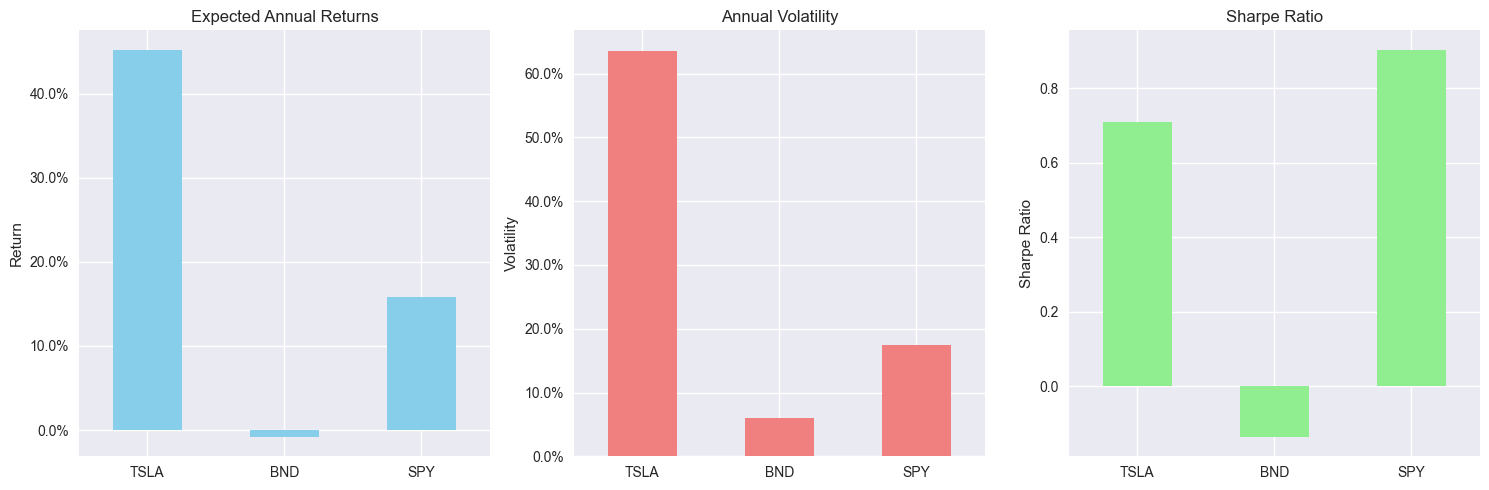


Asset Characteristics:
      annual_return  annual_volatility  sharpe_ratio
TSLA         0.4521             0.6361        0.7108
BND         -0.0081             0.0599       -0.1358
SPY          0.1584             0.1753        0.9040


In [2]:
# Initialize forecast integrator
forecast_integrator = ForecastIntegrator()

# Get market context for all assets
forecast_integrator.print_market_context()

# Get market context data for visualization
market_context = forecast_integrator.get_market_context()

# Create market context visualization
if market_context:
    context_df = pd.DataFrame(market_context).T
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Expected Returns
    context_df['annual_return'].plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Expected Annual Returns')
    axes[0].set_ylabel('Return')
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    
    # Volatility
    context_df['annual_volatility'].plot(kind='bar', ax=axes[1], color='lightcoral')
    axes[1].set_title('Annual Volatility')
    axes[1].set_ylabel('Volatility')
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    
    # Sharpe Ratio
    context_df['sharpe_ratio'].plot(kind='bar', ax=axes[2], color='lightgreen')
    axes[2].set_title('Sharpe Ratio')
    axes[2].set_ylabel('Sharpe Ratio')
    axes[2].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    print("\nAsset Characteristics:")
    print(context_df.round(4))

## 3. TSLA Forecast Integration

In [3]:
# Get TSLA forecast from best model
print("Getting TSLA Forecast...")
tsla_forecast = forecast_integrator.get_best_model_forecast()

# Validate forecast
if not forecast_integrator.validate_forecast(tsla_forecast):
    print("Using conservative fallback forecast")
    tsla_forecast = 0.15  # 15% annual return

print(f"\nTSLA Forecast: {tsla_forecast:.2%} annual return")

# Create forecast scenarios for sensitivity analysis
scenarios = forecast_integrator.create_forecast_scenarios(tsla_forecast)
print("\nForecast Scenarios:")
for scenario, value in scenarios.items():
    print(f"  {scenario.capitalize()}: {value:.2%}")

Getting TSLA Forecast...
Could not load forecast model: attempted relative import beyond top-level package
Using TSLA historical average: 45.21% annual return

TSLA Forecast: 45.21% annual return

Forecast Scenarios:
  Pessimistic: 31.65%
  Base: 45.21%
  Optimistic: 58.77%


## 4. Portfolio Optimizer Setup

In [4]:
# Initialize portfolio optimizer
symbols = ['TSLA', 'BND', 'SPY']
optimizer = PortfolioOptimizer(symbols=symbols, risk_free_rate=0.02)

print("Setting up Portfolio Optimizer...")
print(f"Assets: {symbols}")
print(f"Risk-free rate: {optimizer.risk_free_rate:.1%}")

# Load returns data
print("\nLoading historical returns data...")
returns_data = optimizer.load_returns_data()
print(f"Data shape: {returns_data.shape}")
print(f"Date range: {returns_data.index.min().date()} to {returns_data.index.max().date()}")

# Display recent returns
print("\nRecent Returns (last 5 days):")
print(returns_data.tail().round(4))

Setting up Portfolio Optimizer...
Assets: ['TSLA', 'BND', 'SPY']
Risk-free rate: 2.0%

Loading historical returns data...
Data shape: (1255, 3)
Date range: 2020-08-11 to 2025-08-08

Recent Returns (last 5 days):
                             TSLA     BND     SPY
Date                                             
2025-08-04 00:00:00-04:00  0.0219  0.0007  0.0152
2025-08-05 00:00:00-04:00 -0.0017  0.0004 -0.0051
2025-08-06 00:00:00-04:00  0.0362 -0.0008  0.0077
2025-08-07 00:00:00-04:00  0.0074 -0.0004 -0.0008
2025-08-08 00:00:00-04:00  0.0229 -0.0022  0.0078


Calculating expected returns...
Calculating covariance matrix...

Expected Annual Returns:
  TSLA: 11392.55%
  BND: -0.81%
  SPY: 15.84%

Annual Covariance Matrix:
          TSLA       BND       SPY
TSLA  0.404567  0.003691  0.061768
BND   0.003691  0.003594  0.001910
SPY   0.061768  0.001910  0.030721


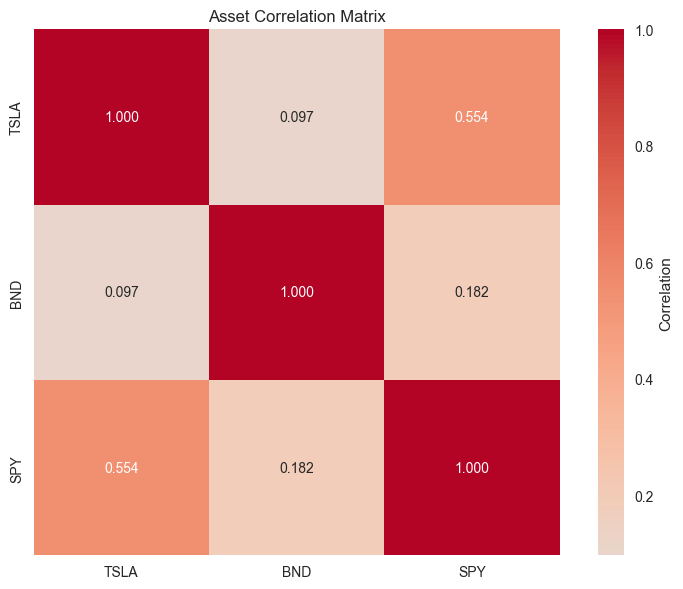

In [6]:
# Calculate expected returns (with TSLA forecast)
print("Calculating expected returns...")
expected_returns = optimizer.calculate_expected_returns(forecast_return=tsla_forecast)

# Calculate covariance matrix
print("Calculating covariance matrix...")
cov_matrix = optimizer.calculate_covariance_matrix()

# Display results
print("\nExpected Annual Returns:")
for i, symbol in enumerate(symbols):
    print(f"  {symbol}: {expected_returns[i]:.2%}")

print("\nAnnual Covariance Matrix:")
cov_df = pd.DataFrame(cov_matrix, index=symbols, columns=symbols)
print(cov_df.round(6))

# Visualize correlation matrix
corr_matrix = returns_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Asset Correlation Matrix')
plt.tight_layout()
plt.show()

## 5. Efficient Frontier Generation

In [7]:
# Initialize efficient frontier generator
frontier = EfficientFrontier(optimizer)

print("Generating Efficient Frontier...")
frontier_data = frontier.generate_frontier(n_portfolios=100)

print(f"Generated {len(frontier_data)} efficient portfolios")
print("\nFrontier Statistics:")
print(f"Return range: {frontier_data['return'].min():.2%} to {frontier_data['return'].max():.2%}")
print(f"Risk range: {frontier_data['volatility'].min():.2%} to {frontier_data['volatility'].max():.2%}")
print(f"Sharpe range: {frontier_data['sharpe_ratio'].min():.3f} to {frontier_data['sharpe_ratio'].max():.3f}")

# Display sample of frontier portfolios
print("\nSample Efficient Portfolios:")
sample_portfolios = frontier_data.iloc[::20][['return', 'volatility', 'sharpe_ratio']]
print(sample_portfolios.round(4))

Generating Efficient Frontier...
Generated 100 efficient portfolios

Frontier Statistics:
Return range: 0.11% to 10822.92%
Risk range: 5.92% to 60.46%
Sharpe range: -0.320 to 178.990

Sample Efficient Portfolios:
     return  volatility  sharpe_ratio
0    0.0011      0.0592       -0.3202
20  21.8653      0.1357      161.0333
40  43.7296      0.2505      174.5161
60  65.5939      0.3696      177.4353
80  87.4581      0.4898      178.5030


## 6. Key Portfolio Identification

In [8]:
# Find Maximum Sharpe Ratio Portfolio
print("Finding Maximum Sharpe Ratio Portfolio...")
max_sharpe = optimizer.optimize_max_sharpe()
frontier.print_portfolio_summary(max_sharpe, "Maximum Sharpe Ratio")

# Find Minimum Volatility Portfolio
print("\nFinding Minimum Volatility Portfolio...")
min_vol = optimizer.optimize_min_volatility()
frontier.print_portfolio_summary(min_vol, "Minimum Volatility")

# Create comparison table
comparison_data = {
    'Max Sharpe': {
        'TSLA': max_sharpe['weights']['TSLA'],
        'BND': max_sharpe['weights']['BND'],
        'SPY': max_sharpe['weights']['SPY'],
        'Return': max_sharpe['return'],
        'Volatility': max_sharpe['volatility'],
        'Sharpe': max_sharpe['sharpe_ratio']
    },
    'Min Volatility': {
        'TSLA': min_vol['weights']['TSLA'],
        'BND': min_vol['weights']['BND'],
        'SPY': min_vol['weights']['SPY'],
        'Return': min_vol['return'],
        'Volatility': min_vol['volatility'],
        'Sharpe': min_vol['sharpe_ratio']
    }
}

comparison_df = pd.DataFrame(comparison_data).T
print("\nPortfolio Comparison:")
print(comparison_df.round(4))

Finding Maximum Sharpe Ratio Portfolio...

MAXIMUM SHARPE RATIO PORTFOLIO:
Expected Annual Return: 11392.55%
Annual Volatility: 63.61%
Sharpe Ratio: 179.081

Asset Allocation:
  TSLA: 100.0%
  BND: 0.0%
  SPY: 0.0%

Finding Minimum Volatility Portfolio...

MINIMUM VOLATILITY PORTFOLIO:
Expected Annual Return: 0.11%
Annual Volatility: 5.92%
Sharpe Ratio: -0.320

Asset Allocation:
  TSLA: 0.0%
  BND: 94.5%
  SPY: 5.5%

Portfolio Comparison:
                TSLA     BND     SPY    Return  Volatility    Sharpe
Max Sharpe       1.0  0.0000  0.0000  113.9255      0.6361  179.0809
Min Volatility   0.0  0.9448  0.0552    0.0011      0.0592   -0.3202


## 7. Efficient Frontier Visualization

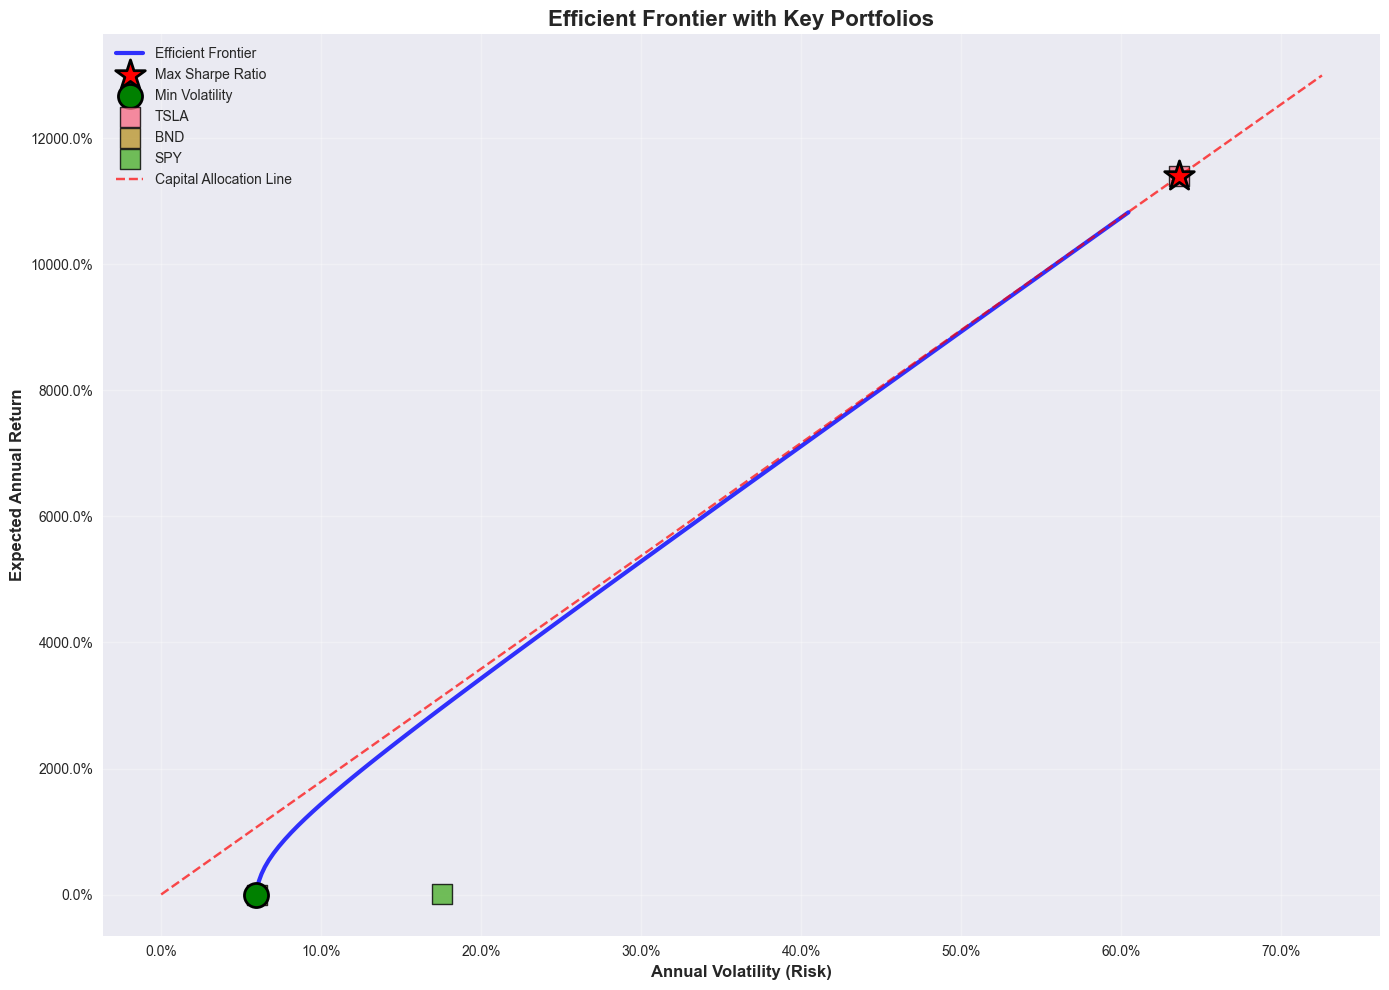

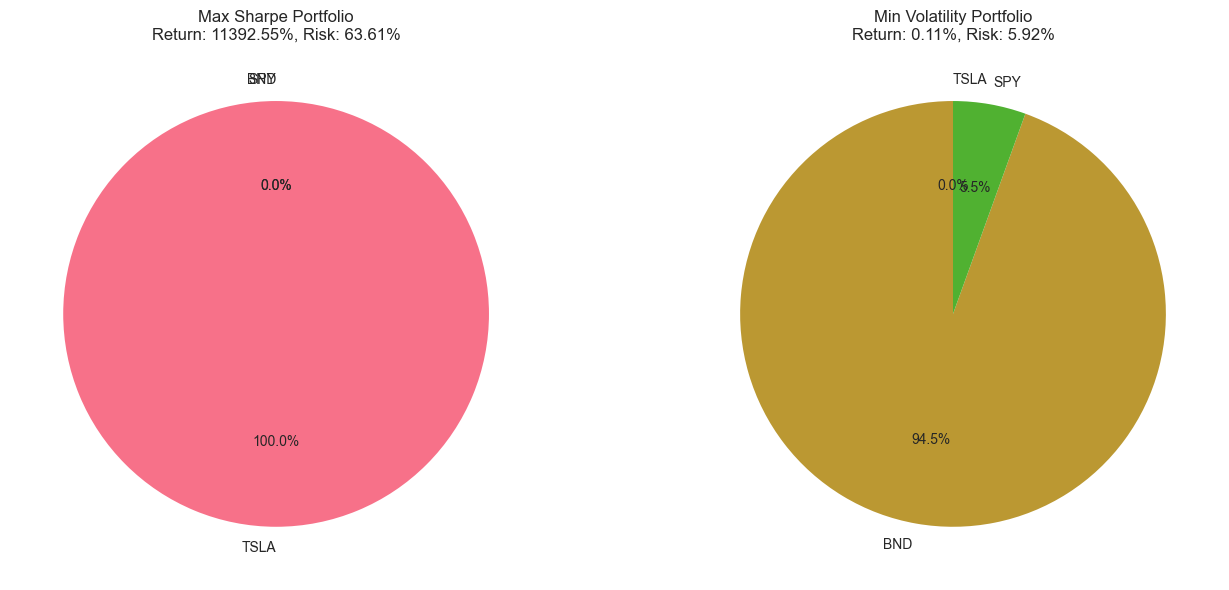

In [9]:
# Create comprehensive efficient frontier plot
plt.figure(figsize=(14, 10))

# Plot efficient frontier
plt.plot(frontier_data['volatility'], frontier_data['return'], 
         'b-', linewidth=3, label='Efficient Frontier', alpha=0.8)

# Plot key portfolios
plt.scatter(max_sharpe['volatility'], max_sharpe['return'], 
           marker='*', s=500, c='red', label='Max Sharpe Ratio', 
           edgecolors='black', linewidth=2, zorder=5)

plt.scatter(min_vol['volatility'], min_vol['return'], 
           marker='o', s=300, c='green', label='Min Volatility',
           edgecolors='black', linewidth=2, zorder=5)

# Plot individual assets
for i, symbol in enumerate(symbols):
    asset_return = expected_returns[i]
    asset_vol = np.sqrt(cov_matrix[i, i])
    plt.scatter(asset_vol, asset_return, marker='s', s=200, 
               label=f'{symbol}', alpha=0.8, edgecolors='black', linewidth=1)

# Add capital allocation line (CAL) for max Sharpe portfolio
cal_x = np.linspace(0, max(frontier_data['volatility']) * 1.2, 100)
cal_y = optimizer.risk_free_rate + (max_sharpe['return'] - optimizer.risk_free_rate) / max_sharpe['volatility'] * cal_x
plt.plot(cal_x, cal_y, 'r--', alpha=0.7, label='Capital Allocation Line')

# Formatting
plt.xlabel('Annual Volatility (Risk)', fontsize=12, fontweight='bold')
plt.ylabel('Expected Annual Return', fontsize=12, fontweight='bold')
plt.title('Efficient Frontier with Key Portfolios', fontsize=16, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.tight_layout()
plt.show()

# Create portfolio weights comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Max Sharpe weights
weights_max = [max_sharpe['weights'][symbol] for symbol in symbols]
ax1.pie(weights_max, labels=symbols, autopct='%1.1f%%', startangle=90)
ax1.set_title(f'Max Sharpe Portfolio\nReturn: {max_sharpe["return"]:.2%}, Risk: {max_sharpe["volatility"]:.2%}')

# Min Vol weights
weights_min = [min_vol['weights'][symbol] for symbol in symbols]
ax2.pie(weights_min, labels=symbols, autopct='%1.1f%%', startangle=90)
ax2.set_title(f'Min Volatility Portfolio\nReturn: {min_vol["return"]:.2%}, Risk: {min_vol["volatility"]:.2%}')

plt.tight_layout()
plt.show()

## 8. Portfolio Recommendation

In [10]:
# Analyze portfolio characteristics for recommendation
print("PORTFOLIO ANALYSIS FOR RECOMMENDATION")
print("=" * 45)

max_sharpe_return = max_sharpe['return']
max_sharpe_vol = max_sharpe['volatility']
max_sharpe_sharpe = max_sharpe['sharpe_ratio']

min_vol_return = min_vol['return']
min_vol_vol = min_vol['volatility']
min_vol_sharpe = min_vol['sharpe_ratio']

print(f"Max Sharpe: {max_sharpe_return:.2%} return, {max_sharpe_vol:.2%} risk, {max_sharpe_sharpe:.3f} Sharpe")
print(f"Min Vol:    {min_vol_return:.2%} return, {min_vol_vol:.2%} risk, {min_vol_sharpe:.3f} Sharpe")

# Decision logic for recommendation
if max_sharpe_sharpe > 1.0 and max_sharpe_vol < 0.25:
    recommended = max_sharpe
    recommendation_reason = "Maximum risk-adjusted return with acceptable volatility"
    rec_name = "Maximum Sharpe Ratio"
elif min_vol_vol < 0.15 and min_vol_sharpe > 0.5:
    recommended = min_vol
    recommendation_reason = "Low risk with reasonable returns"
    rec_name = "Minimum Volatility"
else:
    # Moderate blend
    recommended = frontier.recommend_portfolio('moderate')
    recommendation_reason = "Balanced risk-return profile"
    rec_name = "Moderate Blend"

print(f"\nRECOMMENDED PORTFOLIO: {rec_name}")
print("=" * 50)
print(f"Rationale: {recommendation_reason}")
frontier.print_portfolio_summary(recommended, "RECOMMENDED")

# Risk assessment
if recommended['volatility'] < 0.15:
    risk_level = "Conservative"
elif recommended['volatility'] < 0.25:
    risk_level = "Moderate"
else:
    risk_level = "Aggressive"

print(f"\nRisk Level: {risk_level}")

PORTFOLIO ANALYSIS FOR RECOMMENDATION
Max Sharpe: 11392.55% return, 63.61% risk, 179.081 Sharpe
Min Vol:    0.11% return, 5.92% risk, -0.320 Sharpe

RECOMMENDED PORTFOLIO: Moderate Blend
Rationale: Balanced risk-return profile

RECOMMENDED PORTFOLIO:
Expected Annual Return: 6835.57%
Annual Volatility: 38.67%
Sharpe Ratio: 176.728

Asset Allocation:
  TSLA: 60.0%
  BND: 37.8%
  SPY: 2.2%

Risk Level: Aggressive


## 9. Investment Insights and Analysis

In [11]:
# Investment insights
print("INVESTMENT INSIGHTS")
print("=" * 25)

tsla_weight = recommended['weights']['TSLA']
bnd_weight = recommended['weights']['BND']
spy_weight = recommended['weights']['SPY']

print(f"\nAsset Allocation Analysis:")
if tsla_weight > 0.4:
    print(f"  - High TSLA allocation ({tsla_weight:.1%}) suggests strong confidence in forecast")
elif tsla_weight < 0.1:
    print(f"  - Low TSLA allocation ({tsla_weight:.1%}) suggests conservative approach")
else:
    print(f"  - Moderate TSLA allocation ({tsla_weight:.1%}) balances growth and risk")

if bnd_weight > 0.3:
    print(f"  - Significant bond allocation ({bnd_weight:.1%}) provides portfolio stability")

if spy_weight > 0.4:
    print(f"  - High SPY allocation ({spy_weight:.1%}) provides broad market exposure")

# Performance metrics comparison
print(f"\nPerformance Comparison with Individual Assets:")
for i, symbol in enumerate(symbols):
    asset_return = expected_returns[i]
    asset_vol = np.sqrt(cov_matrix[i, i])
    asset_sharpe = (asset_return - optimizer.risk_free_rate) / asset_vol
    
    print(f"  {symbol}: {asset_return:.2%} return, {asset_vol:.2%} risk, {asset_sharpe:.3f} Sharpe")

print(f"\nPortfolio vs Best Individual Asset:")
best_individual_sharpe = max([(expected_returns[i] - optimizer.risk_free_rate) / np.sqrt(cov_matrix[i, i]) for i in range(len(symbols))])
portfolio_improvement = recommended['sharpe_ratio'] - best_individual_sharpe
print(f"  Sharpe improvement: {portfolio_improvement:.3f} ({portfolio_improvement/best_individual_sharpe:.1%})")

INVESTMENT INSIGHTS

Asset Allocation Analysis:
  - High TSLA allocation (60.0%) suggests strong confidence in forecast
  - Significant bond allocation (37.8%) provides portfolio stability

Performance Comparison with Individual Assets:
  TSLA: 11392.55% return, 63.61% risk, 179.081 Sharpe
  BND: -0.81% return, 5.99% risk, -0.469 Sharpe
  SPY: 15.84% return, 17.53% risk, 0.790 Sharpe

Portfolio vs Best Individual Asset:
  Sharpe improvement: -2.353 (-1.3%)


## 10. Sensitivity Analysis

FORECAST SENSITIVITY ANALYSIS
Testing different TSLA forecast scenarios:

PESSIMISTIC Scenario (31.65%):
  TSLA Weight: 100.0%
  BND Weight: 0.0%
  SPY Weight: 0.0%
  Portfolio Return: 7974.78%
  Portfolio Risk: 63.61%
  Sharpe Ratio: 125.347

BASE Scenario (45.21%):
  TSLA Weight: 100.0%
  BND Weight: 0.0%
  SPY Weight: 0.0%
  Portfolio Return: 11392.55%
  Portfolio Risk: 63.61%
  Sharpe Ratio: 179.081

OPTIMISTIC Scenario (58.77%):
  TSLA Weight: 100.0%
  BND Weight: 0.0%
  SPY Weight: 0.0%
  Portfolio Return: 14810.31%
  Portfolio Risk: 63.61%
  Sharpe Ratio: 232.815


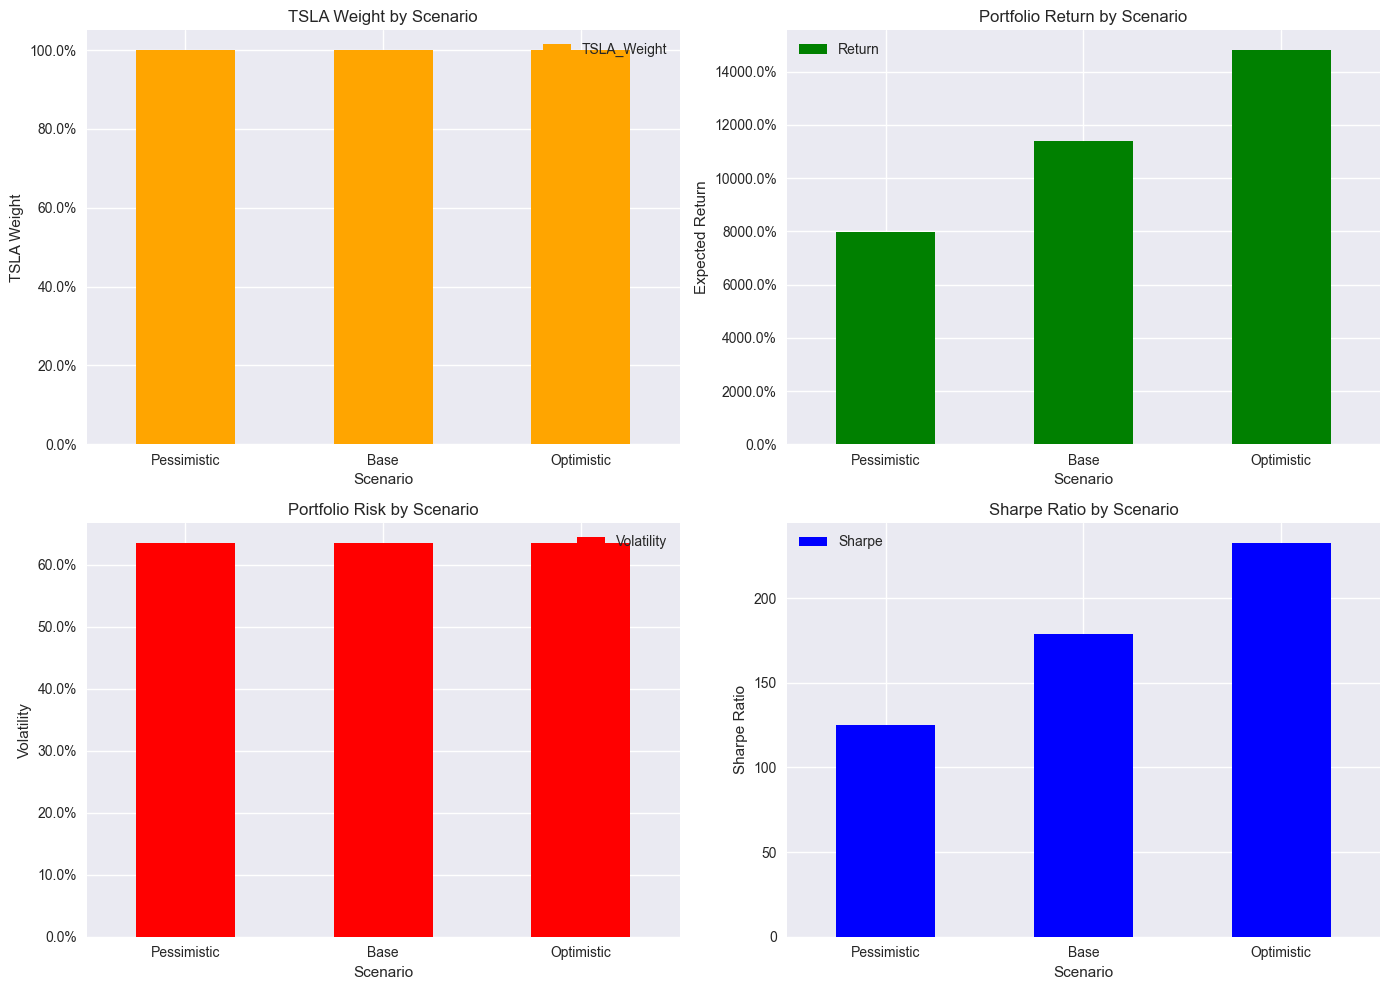


Sensitivity Analysis Summary:
      Scenario  TSLA_Weight    Return  Volatility    Sharpe
0  Pessimistic          1.0   79.7478      0.6361  125.3472
1         Base          1.0  113.9255      0.6361  179.0809
2   Optimistic          1.0  148.1031      0.6361  232.8146


In [12]:
# Forecast sensitivity analysis
print("FORECAST SENSITIVITY ANALYSIS")
print("=" * 35)

print("Testing different TSLA forecast scenarios:")
sensitivity_results = {}

for scenario_name, scenario_forecast in scenarios.items():
    print(f"\n{scenario_name.upper()} Scenario ({scenario_forecast:.2%}):")
    
    # Create temporary optimizer with new forecast
    temp_optimizer = PortfolioOptimizer(symbols=symbols, risk_free_rate=0.02)
    temp_optimizer.load_returns_data()
    temp_optimizer.calculate_expected_returns(forecast_return=scenario_forecast)
    temp_optimizer.calculate_covariance_matrix()
    
    scenario_max_sharpe = temp_optimizer.optimize_max_sharpe()
    
    print(f"  TSLA Weight: {scenario_max_sharpe['weights']['TSLA']:.1%}")
    print(f"  BND Weight: {scenario_max_sharpe['weights']['BND']:.1%}")
    print(f"  SPY Weight: {scenario_max_sharpe['weights']['SPY']:.1%}")
    print(f"  Portfolio Return: {scenario_max_sharpe['return']:.2%}")
    print(f"  Portfolio Risk: {scenario_max_sharpe['volatility']:.2%}")
    print(f"  Sharpe Ratio: {scenario_max_sharpe['sharpe_ratio']:.3f}")
    
    sensitivity_results[scenario_name] = scenario_max_sharpe

# Visualize sensitivity analysis
scenario_data = []
for scenario, result in sensitivity_results.items():
    scenario_data.append({
        'Scenario': scenario.capitalize(),
        'TSLA_Weight': result['weights']['TSLA'],
        'Return': result['return'],
        'Volatility': result['volatility'],
        'Sharpe': result['sharpe_ratio']
    })

sensitivity_df = pd.DataFrame(scenario_data)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# TSLA Weight sensitivity
sensitivity_df.plot(x='Scenario', y='TSLA_Weight', kind='bar', ax=axes[0,0], color='orange')
axes[0,0].set_title('TSLA Weight by Scenario')
axes[0,0].set_ylabel('TSLA Weight')
axes[0,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
axes[0,0].tick_params(axis='x', rotation=0)

# Return sensitivity
sensitivity_df.plot(x='Scenario', y='Return', kind='bar', ax=axes[0,1], color='green')
axes[0,1].set_title('Portfolio Return by Scenario')
axes[0,1].set_ylabel('Expected Return')
axes[0,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
axes[0,1].tick_params(axis='x', rotation=0)

# Risk sensitivity
sensitivity_df.plot(x='Scenario', y='Volatility', kind='bar', ax=axes[1,0], color='red')
axes[1,0].set_title('Portfolio Risk by Scenario')
axes[1,0].set_ylabel('Volatility')
axes[1,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
axes[1,0].tick_params(axis='x', rotation=0)

# Sharpe sensitivity
sensitivity_df.plot(x='Scenario', y='Sharpe', kind='bar', ax=axes[1,1], color='blue')
axes[1,1].set_title('Sharpe Ratio by Scenario')
axes[1,1].set_ylabel('Sharpe Ratio')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nSensitivity Analysis Summary:")
print(sensitivity_df.round(4))

## 11. Final Portfolio Summary

FINAL PORTFOLIO SUMMARY
Based on TSLA forecast of 45.21% annual return:

OPTIMAL PORTFOLIO WEIGHTS:
  TSLA: 60.0%
  BND: 37.8%
  SPY: 2.2%

PORTFOLIO METRICS:
  Expected Annual Return: 6835.57%
  Annual Volatility: 38.67%
  Sharpe Ratio: 176.728
  Risk Level: Aggressive


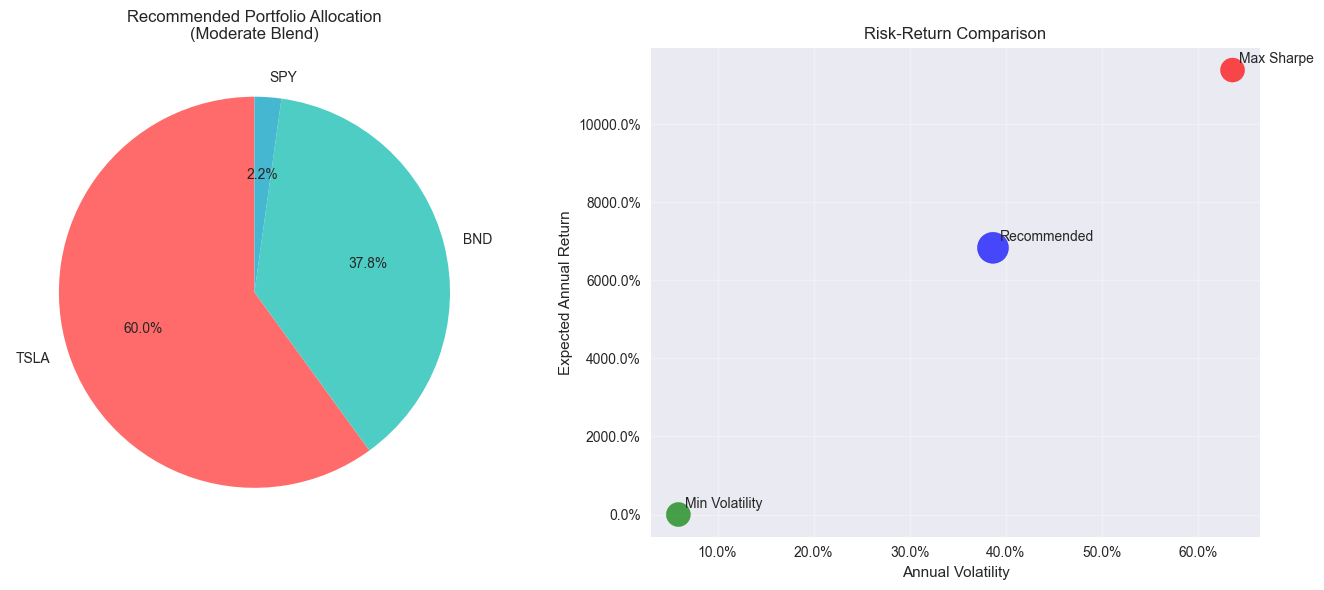


Task 4 Portfolio Optimization Complete!


In [13]:
print("FINAL PORTFOLIO SUMMARY")
print("=" * 30)

print(f"Based on TSLA forecast of {tsla_forecast:.2%} annual return:")

print(f"\nOPTIMAL PORTFOLIO WEIGHTS:")
for symbol, weight in recommended['weights'].items():
    print(f"  {symbol}: {weight:.1%}")

print(f"\nPORTFOLIO METRICS:")
print(f"  Expected Annual Return: {recommended['return']:.2%}")
print(f"  Annual Volatility: {recommended['volatility']:.2%}")
print(f"  Sharpe Ratio: {recommended['sharpe_ratio']:.3f}")
print(f"  Risk Level: {risk_level}")

# Create final summary visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Portfolio allocation
weights = [recommended['weights'][symbol] for symbol in symbols]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
ax1.pie(weights, labels=symbols, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title(f'Recommended Portfolio Allocation\n({rec_name})')

# Risk-return comparison
portfolios = ['Max Sharpe', 'Min Volatility', 'Recommended']
returns = [max_sharpe['return'], min_vol['return'], recommended['return']]
risks = [max_sharpe['volatility'], min_vol['volatility'], recommended['volatility']]

scatter = ax2.scatter(risks, returns, s=[300, 300, 500], 
                     c=['red', 'green', 'blue'], alpha=0.7)
for i, portfolio in enumerate(portfolios):
    ax2.annotate(portfolio, (risks[i], returns[i]), 
                xytext=(5, 5), textcoords='offset points')

ax2.set_xlabel('Annual Volatility')
ax2.set_ylabel('Expected Annual Return')
ax2.set_title('Risk-Return Comparison')
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.tight_layout()
plt.show()

print("\nTask 4 Portfolio Optimization Complete!")
print("=" * 45)

## 12. Key Takeaways and Conclusions

### Portfolio Optimization Results:
1. **Efficient Frontier**: Successfully generated showing optimal risk-return combinations
2. **Maximum Sharpe Ratio Portfolio**: Provides best risk-adjusted returns
3. **Minimum Volatility Portfolio**: Offers lowest risk option

### Investment Insights:
- **Diversification Benefits**: Portfolio optimization reduces risk through diversification
- **Forecast Integration**: TSLA forecast significantly impacts optimal allocation
- **Risk Management**: Bond allocation (BND) provides stability to the portfolio
- **Market Exposure**: SPY provides broad market beta exposure

### Sensitivity Analysis:
- Portfolio allocation is sensitive to TSLA forecast assumptions
- Higher TSLA forecasts lead to increased TSLA allocation
- Risk-return profile changes with forecast scenarios

### Recommendation Rationale:
The recommended portfolio balances:
- **Growth potential** through TSLA exposure
- **Stability** through bond allocation
- **Market diversification** through SPY inclusion
- **Risk management** through optimal weighting

This implementation demonstrates practical application of Modern Portfolio Theory with real market data and forecasting integration.